# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [121]:
# import everything we need
import numpy as np
import pandas as pd


In [122]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [123]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above

df=pd.read_csv("boston.csv", index_col=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Model Training

In [124]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [125]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame

x= df[['RM']] #independent  --> feature
y=df['MEDV'] # dependent  --> target
print(x)
print(y)

        RM
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
..     ...
501  6.593
502  6.120
503  6.976
504  6.794
505  6.030

[506 rows x 1 columns]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [126]:
# We need 2D arrays for x_train 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42) #split dataset

print("X-Train \n",x_train.shape)
print("Y-Train: \n",x_test.shape)

X-Train 
 (404, 1)
Y-Train: 
 (102, 1)


In [127]:
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept

In [128]:
model=LinearRegression()
model.fit(x_train,y_train)
model.coef_
model.intercept_

print("Coefficient: \n",model.coef_)
print("Intercept: \n", model.intercept_)

Coefficient: 
 [9.34830141]
Intercept: 
 -36.24631889813795


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [129]:
y_pred=model.predict(x_test)

print("y_prediction: \n", y_pred)

y_prediction: 
 [23.73238293 26.92950201 19.68456842 20.45112913 22.61993506 22.45166563
 19.03953562 21.47009399 21.98425056 20.09589368 19.38542277 19.88088275
  5.99865516 22.01229547 17.11378553 29.00482492 18.71234507  9.37339197
 37.37155468 21.5729253  22.08708188 24.34937082 17.16052704 25.38703227
 19.89957935 14.48691283 18.66560356 26.64905296 19.46955748 17.91773945
 15.84241654 23.82586594 32.11780929 13.87927324 19.87153445 17.12313383
 30.92122671 18.61886206 20.44178083 22.13382339 14.14102568 27.78019743
 38.8579346  16.04807917 23.74173123 17.16052704 17.04834742 23.74173123
 21.40465588 25.21876285 19.92762425 28.8926453  21.17094834 27.14451294
 33.58549261 22.76015958 21.89076755 27.89237705 23.47997879 16.15091049
 26.96689521 31.519518   25.00375192 14.75801358 25.25615606 13.71100382
 24.2465395  22.66667657 25.40572888 19.61913031 17.84295304 26.8547156
 18.47863754 19.24519825 21.15225174 14.72996867 21.40465588 37.16589205
 24.93831381 14.36538492 18.76843488

# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [130]:
# we can see the coefficient and intercept our model finds

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test, y_pred)
r2_score=r2_score(y_test,y_pred)

print("Mean Square Error: \n", mse)
print("r2 Score: \n", r2_score)

Mean Square Error: 
 46.144775347317264
r2 Score: 
 0.3707569232254778


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

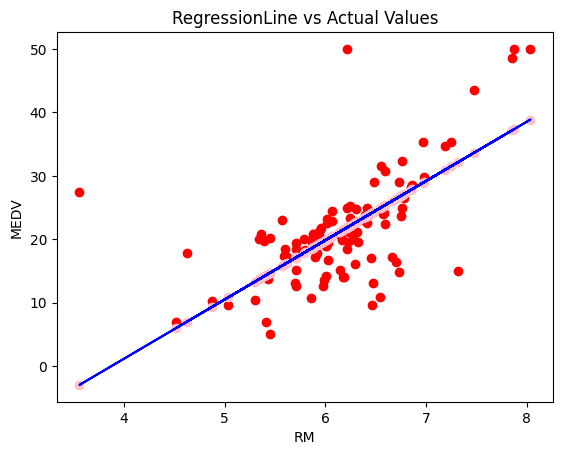

In [131]:


import matplotlib.pyplot as plt

x="RM"
Y="MEDV"

plt.scatter(x_test, y_test, color="red")
plt.scatter(x_test, y_pred, color="pink")
plt.plot(x_test, y_pred, color ="blue")

plt.title("RegressionLine vs Actual Values")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

Plot the regression line (blue) vs the actual value (red)

In [132]:
# We want to plot the regression line(blue) vs the actual value(red)


